In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import math
import operator 


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier


from sklearn.ensemble import ExtraTreesClassifier

In [2]:
data = pd.read_csv('LosAngeles.csv',header = None)

In [3]:
y = data.ix[1:len(data),4].values 
X = data.iloc[1:len(data), [1,12,14,20,16]].values

In [4]:
model = ExtraTreesClassifier()
model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.33344868  0.18824955  0.19930629  0.18152603  0.09746945]


In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 1)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)


[False False False False  True]
[3 4 2 5 1]


In [6]:
 from sklearn import datasets, svm
digits = datasets.load_digits()

svc = svm.SVC(C=1, kernel='linear')
svc.fit(X, y).score(X, y)


0.69863013698630139

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test,y_test,test_size=0.50, random_state=42)

In [8]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol = 0.0001)
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_dev
predicted = model.predict(X_dev)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("accuracy: " , accuracy_score(expected, predicted))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

       GOOD       0.00      0.00      0.00         3
   MODERATE       0.71      0.97      0.82        33
  UNHEALTHY       1.00      0.17      0.29         6
UNHEALTHY FOR SENSITIVE GROUPS       0.44      0.31      0.36        13

avg / total       0.64      0.67      0.61        55

[[ 0  3  0  0]
 [ 0 32  0  1]
 [ 0  1  1  4]
 [ 0  9  0  4]]
accuracy:  0.672727272727


C:\Users\David\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_dev
predicted = model.predict(X_dev)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("accuracy: " , accuracy_score(expected, predicted))

GaussianNB()
             precision    recall  f1-score   support

       GOOD       0.00      0.00      0.00         3
   MODERATE       0.79      0.91      0.85        33
  UNHEALTHY       1.00      0.33      0.50         6
UNHEALTHY FOR SENSITIVE GROUPS       0.57      0.62      0.59        13

avg / total       0.72      0.73      0.70        55

[[ 0  2  0  1]
 [ 1 30  0  2]
 [ 0  1  2  3]
 [ 0  5  0  8]]
accuracy:  0.727272727273


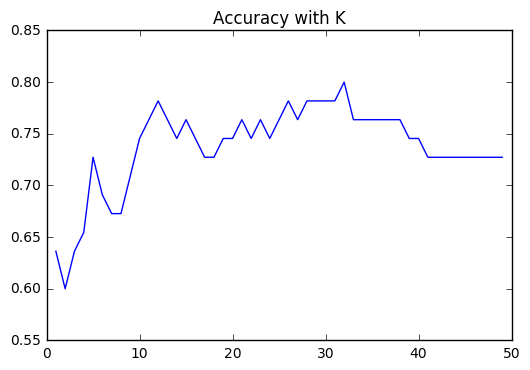

In [10]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
kResult =[]
for n in range(1, 50,1):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)
#print(model)
# make predictions
    expected = y_dev
    predicted = model.predict(X_dev)
# summarize the fit of the model
#print(metrics.classification_report(expected, predicted))
#print(metrics.confusion_matrix(expected, predicted))
    acc = accuracy_score(expected, predicted)
    kResult.append([n,acc])

#print("accuracy: " , accuracy_score(expected, predicted))
kResult = pd.DataFrame(kResult, columns=["n", "acc"])
plt.plot(kResult.n, kResult.acc)
plt.title("Accuracy with K")
plt.show()

In [11]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data

model = KNeighborsClassifier(n_neighbors = 32)
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_dev
predicted = model.predict(X_dev)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
   
print("accuracy: " , accuracy_score(expected, predicted))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=32, p=2,
           weights='uniform')
             precision    recall  f1-score   support

       GOOD       0.00      0.00      0.00         3
   MODERATE       0.78      0.97      0.86        33
  UNHEALTHY       1.00      0.67      0.80         6
UNHEALTHY FOR SENSITIVE GROUPS       0.80      0.62      0.70        13

avg / total       0.77      0.80      0.77        55

[[ 0  3  0  0]
 [ 0 32  0  1]
 [ 0  1  4  1]
 [ 0  5  0  8]]
accuracy:  0.8


C:\Users\David\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_dev
predicted = model.predict(X_dev)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("accuracy: " , accuracy_score(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
             precision    recall  f1-score   support

       GOOD       0.00      0.00      0.00         3
   MODERATE       0.73      0.82      0.77        33
  UNHEALTHY       0.33      0.33      0.33         6
UNHEALTHY FOR SENSITIVE GROUPS       0.67      0.46      0.55        13

avg / total       0.63      0.64      0.63        55

[[ 0  3  0  0]
 [ 3 27  2  1]
 [ 0  2  2  2]
 [ 0  5  2  6]]
accuracy:  0.636363636364


In [13]:
from sklearn import metrics
from sklearn.svm import SVC
# fit a SVM model to the data
model = SVC(cache_size = 200, class_weight = None, )
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_dev
predicted = model.predict(X_dev)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("accuracy: " , accuracy_score(expected, predicted))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

       GOOD       0.00      0.00      0.00         3
   MODERATE       0.60      1.00      0.75        33
  UNHEALTHY       0.00      0.00      0.00         6
UNHEALTHY FOR SENSITIVE GROUPS       0.00      0.00      0.00        13

avg / total       0.36      0.60      0.45        55

[[ 0  3  0  0]
 [ 0 33  0  0]
 [ 0  6  0  0]
 [ 0 13  0  0]]
accuracy:  0.6


C:\Users\David\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
y = data.ix[1:len(data),3].values 
X = data.iloc[1:len(data), [1,12,14,20,16]].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test,y_test,test_size=0.50, random_state=42)

In [16]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

y_poly = svr_poly.fit(X_train, y_train).predict(X_dev)
print(svr.score(X_dev,y_dev))

NameError: name 'svr' is not defined